# Background 



 n
Dataset URL: [Flight Price Dataset](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data)

# Import Libraries 

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Utilities
import joblib
from scipy.stats import randint, uniform

# Data Loading 

In [2]:
df = pd.read_csv('flight_data.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Dataset Column Descriptions

Below is the description of each column in the dataset to help users understand its contents:

1. **`Unnamed: 0`**  
   An automatically generated index column with no direct relevance to analysis or prediction. It is typically created when reading a dataset from a CSV file.

2. **`airline`**  
   The name of the airline offering the ticket. Examples include "SpiceJet," "AirAsia," and "Vistara." This column helps understand the impact of the airline on ticket pricing.

3. **`flight`**  
   A unique identifier for each flight, usually represented by flight codes such as "SG-8709." This column is more informative than analytical.

4. **`source_city`**  
   The departure city of the flight, indicating the starting point of the passenger's journey. Example: "Delhi."

5. **`departure_time`**  
   The departure time of the flight, grouped into periods such as "Morning," "Afternoon," "Evening," and "Night." This helps analyze pricing patterns based on departure times.

6. **`stops`**  
   The number of stops during the journey. Examples: "zero" (direct flight), "one" (one stop), or "two_or_more" (two or more stops).

7. **`arrival_time`**  
   The arrival time of the flight, also grouped into time periods like "Morning," "Afternoon," "Evening," and "Night." This helps understand the relationship between arrival time and ticket prices.

8. **`destination_city`**  
   The destination city of the flight, representing the end point of the passenger's journey. Example: "Mumbai."

9. **`class`**  
   The travel class of the ticket, such as "Economy" or "Business." This information significantly influences ticket prices.

10. **`duration`**  
    The duration of the journey in hours, including flight time and stopovers (if any). Example: 2.17 hours.

11. **`days_left`**  
    The number of days left until the departure date from the time the ticket was purchased. This helps analyze pricing patterns based on proximity to the departure date.

12. **`price`**  
    The price of the flight ticket in Indian Rupee (INR) currency. This is the target variable to be predicted by the machine learning model 

Usage Example
With this description, dataset users can understand that features like **`airline`**, **`class`**, **`days_left`**, and **`duration`** are key factors influencing **`price`**, the target variable.


In [3]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [4]:
df.shape

(300153, 12)

# EDA 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [8]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [9]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


> Drop column Unnamed: 0 since it's not relateable for the analysist

In [10]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

> AS we could see from the result above the data has 6 different airlines available for analysis

In [11]:
# Calculate the skewness 
skew = df['price'].skew()
print('Result:', skew)

Result: 1.0613772532064343


> The distribution is right-skewed, meaning that the distribution is not normal and probably have some outlier 

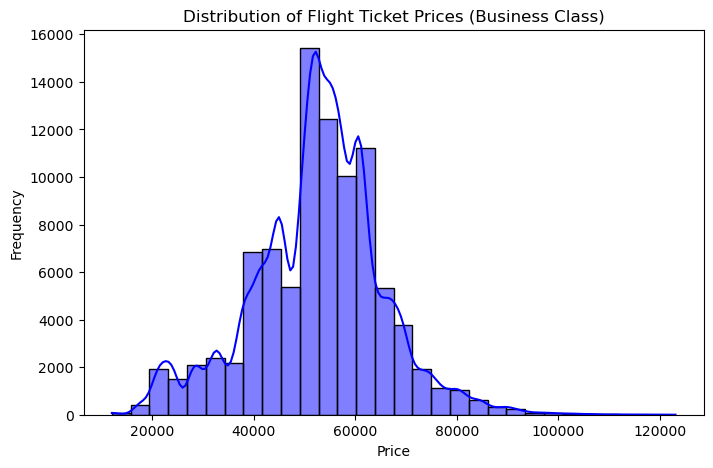

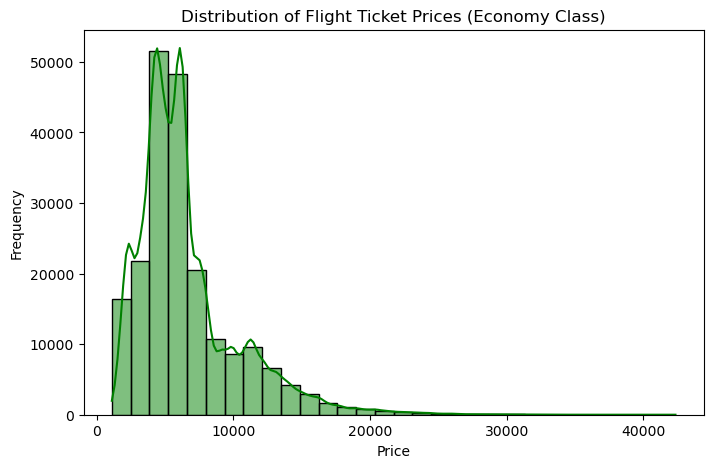

In [12]:
# Separate the data for business and economy classes
df_business = df[df['class'] == 'Business']
df_economy = df[df['class'] == 'Economy']

# Visualize the distribution of the target variable (price) for Business class
plt.figure(figsize=(8, 5))
sns.histplot(df_business['price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Flight Ticket Prices (Business Class)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of the target variable (price) for Economy class
plt.figure(figsize=(8, 5))
sns.histplot(df_economy['price'], kde=True, bins=30, color='green')
plt.title('Distribution of Flight Ticket Prices (Economy Class)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Calculate the average price for each class (Economy and Business)
avg_price = df.groupby('class')['price'].mean()

avg_price

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

> This shows a significant difference in pricing between the two classes since the dataset have 2 flight category economy and business

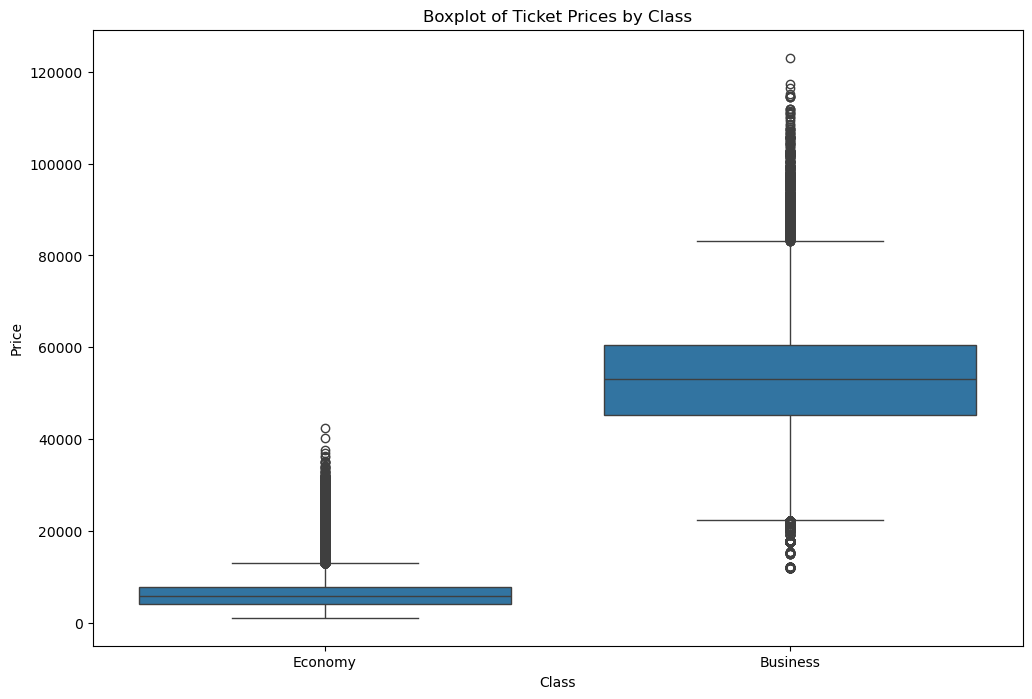

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='price', data=df)
plt.title('Boxplot of Ticket Prices by Class')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

Text(0.5, 1.0, 'Airline prices based on the class and company')

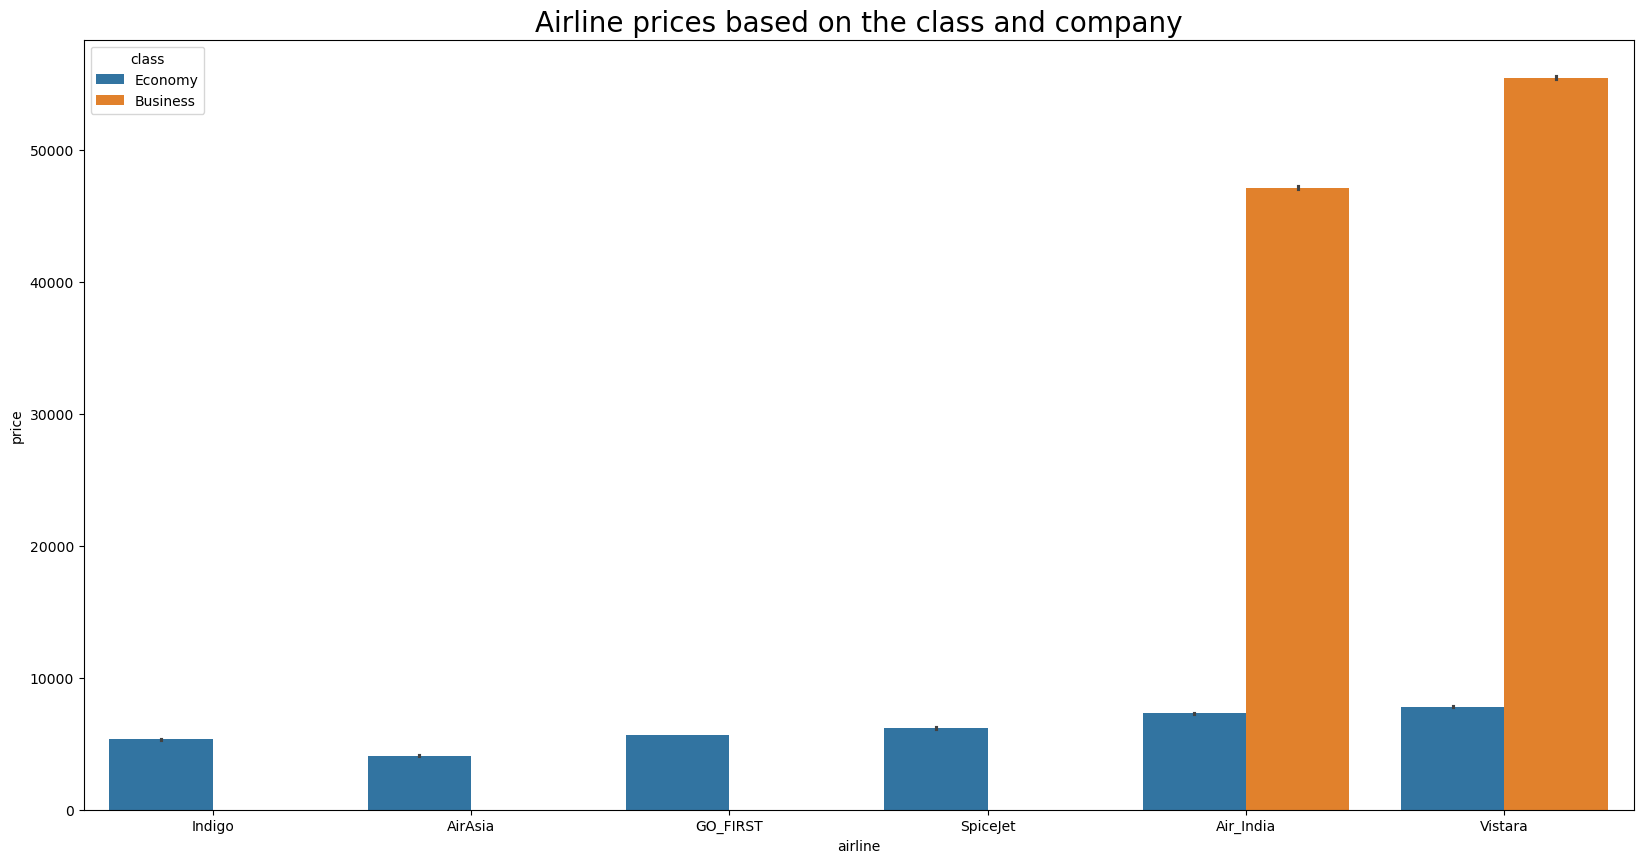

In [15]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

> We could see that there is a huge price gap between the business class and economy class. The airline that provides a business class tends to has higher price, whereas low-cost airlines sets lower price  

> Since the data distribution in 'price' column is not normal we'll use pearson method to find the correlation within the data frame 

In [16]:
# check correlation
correlation_duration = df['price'].corr(df['duration'], method='pearson')

print('Correlation between Price and Duration:', correlation_duration)

Correlation between Price and Duration: 0.20422236784542705


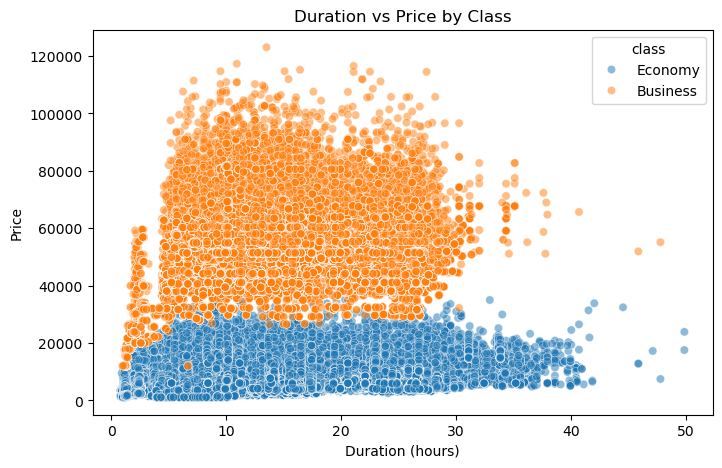

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='duration', y='price', hue='class', data=df, alpha=0.5)
plt.title('Duration vs Price by Class')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.show()

> Weak positive correlation
- This indicates that flights with longer durations tend to have slightly higher ticket prices.

- This relationship makes sense because longer durations often mean longer distances or more stops, which increases costs.

In [18]:
# check correlation
correlation_days = df['price'].corr(df['days_left'], method='pearson')

print('Correlation between Price and Days left:', correlation_days)

Correlation between Price and Days left: -0.09194853217143828


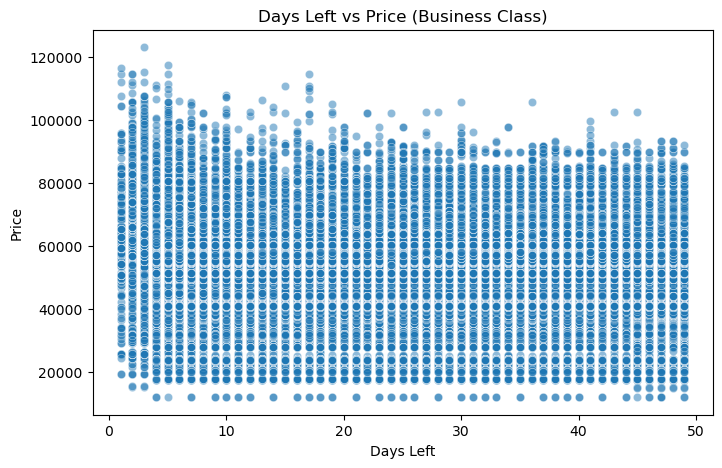

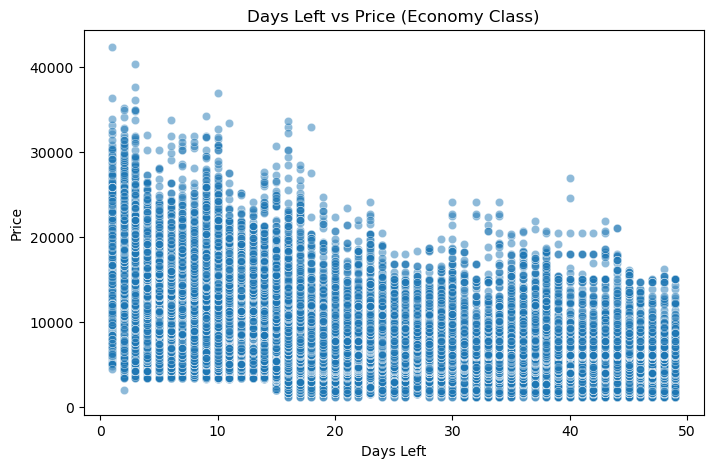

In [19]:
# Separate the data for business and economy classes
df_business = df[df['class'] == 'Business']
df_economy = df[df['class'] == 'Economy']

# Plot for Business class
plt.figure(figsize=(8, 5))
sns.scatterplot(x='days_left', y='price', data=df_business, alpha=0.5)
plt.title('Days Left vs Price (Business Class)')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

# Plot for Economy class
plt.figure(figsize=(8, 5))
sns.scatterplot(x='days_left', y='price', data=df_economy, alpha=0.5)
plt.title('Days Left vs Price (Economy Class)')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

> Weak negative correlation 
- This indicates that flights booked further in advance tend to be slightly cheaper.

- The negative relationship reflects airline pricing strategies, where booking earlier often results in lower prices.

In [20]:
numerical_cols= df[['duration', 'days_left', 'price']].corr(method='pearson')

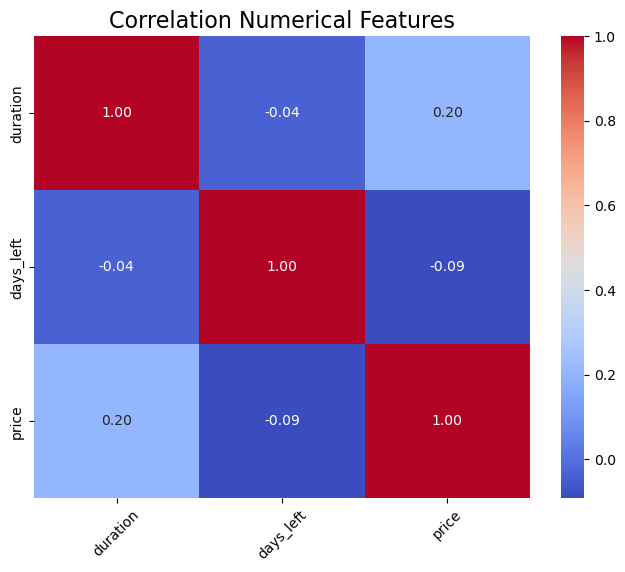

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_cols, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.show()

> Insights from the visualizations:

1. **Price Distribution**:
    - **Economy Class**: Right-skewed, indicating high-priced tickets due to some premium fares.
    - **Business Class**: Right-skewed, indicating high-priced tickets due to premium fares.

2. **Class Boxplots**:
    - Significant price difference between business and economy classes.

3. **Airline Prices**:
    - Clear price gap between classes premium airlines have higher prices.

4. **Duration vs Price**:
    - Weak positive correlation longer flights have slightly higher prices.

5. **Days Left vs Price**:
    - Weak negative correlation booking earlier generally results in lower prices.

# Business Insight

**Dynamic Pricing:**
- Airlines implement dynamic pricing strategies based on booking timing and flight duration.
- Encouraging earlier bookings could help airlines optimize capacity while offering lower prices to customers.

**Segmentation by Class and Airline:**
- Premium airlines benefit from offering distinct pricing tiers for economy and business classes.
- Low-cost carriers focus on economy-class customers by maintaining competitive and predictable pricing.

**Route Optimization:**
- Airlines can optimize routes to balance operational costs and pricing, ensuring profitability while offering competitive prices.

**Duration and Pricing:**
- Longer flights tend to have higher operational costs (e.g., fuel consumption), justifying higher ticket prices.


# Feature Enginering 

In [22]:
# Check and handle outliers by analyzing skewness
num_cols = list(df.select_dtypes(exclude='object').columns)
listItem = []
for col in num_cols:
    skew_value = round(df[col].skew(), 1)
    distribution = 'Normal' if -0.5 <= skew_value <= 0.5 else 'Skewed'
    listItem.append([col, skew_value, distribution])

skewness = pd.DataFrame(columns=['Columns Name', 'Skewness', 'Distribution'], data=listItem)
skewness

,Columns Name,Skewness,Distribution
0,duration,0.6,Skewed
1,days_left,-0.0,Normal
2,price,1.1,Skewed


In [23]:
# Find upper, lower boundaries and percentage of outliers
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range(len(skewness)):
    col = skewness['Columns Name'][row]
    # Check upper and lower boundaries
    if skewness['Distribution'][row] == 'Skewed':
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (IQR * 1.5)
        upper_boundary = df[col].quantile(0.75) + (IQR * 1.5)
    else:
        lower_boundary = df[col].mean() - 3 * df[col].std()
        upper_boundary = df[col].mean() + 3 * df[col].std()
    # Add to the list
    column.append(col)
    lower_bound.append(lower_boundary)
    upper_bound.append(upper_boundary)
    totout = ((len(df[df[col] > upper_boundary]) / len(df) * 100) + (len(df[df[col] < lower_boundary]) / len(df) * 100))
    percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'Column': column,
    # Round values
    'Lower_boundary': [round(lower_bound, 2) for lower_bound in lower_bound],
    'Upper_boundary': [round(upper_bound, 2) for upper_bound in upper_bound],
    'Percentage_total_outlier': [round(percent_total_outlier, 2) for percent_total_outlier in percent_total_outlier]
})
outliers

,Column,Lower_boundary,Upper_boundary,Percentage_total_outlier
0,duration,-7.18,30.18,0.70
1,days_left,-14.68,66.69,0.00
2,price,-51824.00,99128.00,0.04


### Handling Outliers

> We will not handle the outliers since we want to analyze the real data without capping the outliers. The outliers in this dataframe will be needed for further analysis, and since the outlier percentage is lower than 5%, it means that we will not have to handle outliers. Furthermore, we will be using 5 different kind of model which one of them is Randomforest that is robust to outlier. 

### Drop target column 

In [24]:
# Define the target and features
X = df.drop('price', axis=1)
y = df['price']

### Pipeline 

In [25]:
# Determine columns for encoding and scaling
onehot_cols = ['airline', 'source_city', 'destination_city', 'class']
ordinal_cols = ['departure_time', 'arrival_time', 'stops']
numerical_cols = ['duration', 'days_left']

> Separate the columns into variables based on what we are going to process:

- **OneHot Encoding**: The `onehot_cols` are chosen because they are nominal and have no logical order.
- **Ordinal Encoding**: The `ordinal_cols` are chosen because they have a logical order, like `departure_time` and `stops`.
- **Scaling**: The `numerical_cols` use `StandardScaler` to standardize the scale of numerical features. Since the outlier percentage is less than 5% and we did not handle the outliers, we can use `StandardScaler` to ensure that the numerical features have a mean of 0 and a standard deviation of 1, which helps in improving the performance of many machine learning algorithms.

In [26]:
# Update preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), onehot_cols),
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_cols),
        ('scaler', StandardScaler(), numerical_cols)
    ]
)

> Here we're going to list down different models that we wanted to use 

In [27]:
# Models to be used
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    #'SVM': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Boosting': GradientBoostingRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

Models Used in Prediction

1. **Linear Regression**  
   - Assumes a linear relationship between features and target.  
   - Fast and interpretable but struggles with non-linear data.

2. **K-Nearest Neighbors (KNN)**  
   - Predicts based on the average of `k` nearest points.  
   - Effective for local patterns but sensitive to `k` and scaling.

3. **Random Forest**  
   - Builds multiple trees and averages predictions.  
   - Robust, handles non-linear data, but computationally heavy.

4. **Gradient Boosting (Boosting)**  
   - Sequentially builds trees to correct previous errors.  
   - Accurate but prone to overfitting without tuning.

5. **Decision Tree**  
   - Splits data based on features to predict.  
   - Easy to interpret but overfits when too deep.

6. **Support Vector Machine (SVM)**  
   - Fits data within a tolerance margin using kernels.  
   - Great for complex data but computationally expensive.

Key Points
- Linear Regression and KNN are simple but limited for non-linear data.
- Random Forest and Boosting are robust but need more resources.
- Decision Tree is interpretable but less accurate alone.
- SVM handles complex data but is slow for large datasets.

The best model is determined using metrics like MSE and R².


### Split Train and Test 

In [28]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Spliting the data (test & train) 80/20 

In [ ]:
# Save evaluation before CV
results = {}

for name, model in models.items():
    # Build pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on test set
    y_pred_test = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Calculate metrics
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_pred_test)
    
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_pred_train)

    # Save result
    results[name] = {
        'Train MSE': train_mse,
        'Train RMSE': train_rmse,
        'Train R²': train_r2,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test R²': test_r2
    }

results = pd.DataFrame(results).T
results

,Train MSE,Train RMSE,Train R²,Test MSE,Test RMSE,Test R²
Linear Regression,4.710894e+07,6863.595222,0.908546,4.716314e+07,6867.542700,0.908507
KNN,8.656544e+06,2942.200501,0.983195,1.401619e+07,3743.819803,0.972810
Random Forest,1.283629e+06,1132.973595,0.997508,7.873196e+06,2805.921554,0.984727
Boosting,2.454933e+07,4954.727832,0.952342,2.502892e+07,5002.891239,0.951446
Decision Tree,3.674836e+05,606.204225,0.999287,1.257821e+07,3546.577302,0.975599


### **Train & Test Evaluation Metrics**

| Model              | Train MSE     | Train RMSE  | Train R²   | Test MSE      | Test RMSE    | Test R²    | Explanation                                                                 |
|--------------------|---------------|-------------|-----------|----------------|---------------|-------------|------------------------------------------------------------------------------|
| **Linear Regression** | 47,108,940   | 6863.60     | 0.908546  | 47,163,140     | 6867.54       | 0.908507   | High error on both sets, underfitting — poor at capturing complexity.       |
| **KNN**              | 8,656,544    | 2942.20     | 0.983195  | 14,016,190     | 3743.82       | 0.972810   | Good performance, but signs of overfitting (gap between train & test R²).   |
| **Random Forest**    | 1,283,629    | 1132.97     | 0.997508  | 7,873,196      | 2805.92       | 0.984727   | Best overall — low error, high accuracy, small gap shows good generalization. |
| **Boosting**         | 24,549,330   | 4954.73     | 0.952342  | 25,028,920     | 5002.89       | 0.951446   | Stable performance, but less optimal than Random Forest.                    |
| **Decision Tree**    | 367,483      | 606.20      | 0.999287  | 12,578,210     | 3546.58       | 0.975599   | Very high train R² shows overfitting — poor generalization on test set.     |

---

### **Insights:**

1. **Best Model:**  
   - **Random Forest** is the top performer with the lowest Test MSE (7,873,196) and highest Test R² (0.984727), showing strong predictive power and balance between bias-variance.

2. **Potential Overfitting Models:**
   - **Decision Tree** has extremely high Train R² (0.999), which indicates overfitting.
   - **KNN** also has a notable gap between Train and Test metrics.

3. **Underperforming Model:**
   - **Linear Regression** shows high error on both training and testing sets, indicating underfitting — not suitable for complex patterns in the data.

4. **Consistent but Less Accurate:**
   - **Boosting** gives stable results but is not better than Random Forest in either MSE or R².

---

### **Final Note:**
- **Random Forest** remains the most robust model, but it’s important to also evaluate using **cross-validation** to ensure consistent performance across different data splits.


# Cross Validation 

> Reason for Model Evaluation

Each model was tested using a pipeline to ensure consistent preprocessing across models. Mean Squared Error (MSE) was used as the evaluation metric to measure the average prediction error.

In [ ]:
# Save evaluation results_cv
results_cv = {}

# Iterate over each model
for name, model in models.items():
    # Pipeline with model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)       
    ])
    
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    mean_cv_score = np.mean(cv_scores) 
    std_score = np.std(cv_scores)
    
    # Save results_cv
    results_cv[name] = {
        'Mean CV MSE': mean_cv_score,
        'Std CV MSE': std_score
    }

results_cv = pd.DataFrame(results_cv).T
results_cv

,Mean CV MSE,Std CV MSE
Linear Regression,4.711924e+07,428942.930445
KNN,1.445126e+07,149037.292151
Random Forest,7.707999e+06,136406.195797
Boosting,2.455796e+07,272674.660802
Decision Tree,1.229232e+07,247375.185535


# Model Evaluation Results

**Explanation**

| Metric          | Explanation                                              | Why                                   |
|-----------------|------------------------------------------------------------------|----------------------------------------------------------|
| Mean CV MSE     | Average model prediction error | Lower = more accurate predictions                      |
| Std CV MSE      | How stable the prediction in every fold cross validation   | Lower = more consistent / reliable model               |

 **Mean Cross-Validation Mean Squared Error (CV MSE)**

| Model              | Mean CV MSE   | Std CV MSE   | Explanation                                                              |
|--------------------|---------------|--------------|--------------------------------------------------------------------------|
| **Linear Regression** | 47,119,240   | 428,943      | High error, indicating it is not well-suited for capturing complexities. |
| **KNN**              | 14,451,260   | 149,037      | Performs moderately but less stable than Random Forest.                  |
| **Random Forest**    | 7,707,999    | 136,406      | Best model with the lowest Mean CV MSE and stable performance.           |
| **Boosting**         | 24,557,960   | 272,675      | Shows higher error than Random Forest, indicating it is less effective.  |
| **Decision Tree**    | 12,292,320   | 247,375      | Moderate performance but less stable than Random Forest.                 |

---

Insights:
1. **Best Model:**  
   - Random Forest outperforms other models with the lowest Mean CV MSE (7,707,999) and the lowest standard deviation (Std CV MSE of 136,406), indicating high accuracy and consistency.

2. **Alternative Models:**  
   - KNN performs moderately well but has a higher Std CV MSE compared to Random Forest, suggesting it is less consistent.
   - Decision Tree is less stable, with a relatively high standard deviation, making it unsuitable for this dataset.

3. **Underperforming Models:**  
   - Linear Regression and Boosting both show significantly higher Mean CV MSE, making them less favorable for this task.

---

 **Conclusion:**  
Based on the evaluation, **Random Forest** is the most suitable model due to its high predictive accuracy and consistent performance.And also looking at the mean CV MSE and std CV MSE the lower the better 


In [31]:
# Define the SVM model
svm_model = SVR(kernel='linear')

# Create a pipeline with the preprocessor and the SVM model
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', svm_model)
])

# Fit the model
svm_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = svm_pipeline.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Initialize results_svm dictionary
results_svm = {}

# Save result
results_svm['SVM'] = {
    'Test MSE': mse,
    'Test R²': r2
}

results_svm_df = pd.DataFrame(results_svm).T
results_svm_df

,Test MSE,Test R²
SVM,5.329225e+07,0.896617


> Conclusion

- **Best Model**: Random Forest.
- **Performance**: It achieves the lowest Mean CV MSE and the smallest Std CV MSE, indicating both high accuracy and consistent performance.
- **Reason**: Random Forest excels because it effectively handles complex data, thanks to its use of multiple decision trees that enhance prediction accuracy.
- **Comparison**: Linear Regression is less suitable for this dataset as the data likely contains non-linear relationships.

Thus, we are going to be using the Random Forest model.


# Hyperparameter Tuning 

In [33]:
# Parameter distributions for Random Forest model
param_dist = {
    'model__n_estimators': randint(50, 200),  # Estimators between 50 to 200
    'model__max_depth': [10, 20, None],  # Tree depth
    'model__min_samples_split': randint(2, 10)  # Minimum split between 2 to 10
}

# Pipeline with Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', models['Random Forest'])
])

# RandomizedSearchCV for Random Forest model
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist, 
    n_iter=10,  # Limit iterations for speed
    cv=3, 
    scoring='neg_mean_squared_error', 
    random_state=42,
    n_jobs=-1
)

# Train RandomizedSearchCV
random_search.fit(X_train, y_train)

# Save best results
tuning_results_random = {
    'best_params': random_search.best_params_,
    'best_score': -random_search.best_score_
}

# Display tuning results
tuning_results_random

{'best_params': {'model__max_depth': None,
  'model__min_samples_split': 9,
  'model__n_estimators': 166},
 'best_score': 7392614.255998541}

**Result**

| Parameter               | Value          | Explanation                                                                 |
|-------------------------|----------------|-----------------------------------------------------------------------------|
| Best max_depth          | None           | Maximum depth of each decision tree|
| Best min_samples_split  | 9              | Minimum samples to split a node|
| Best n_estimators       | 166            | Number of trees in the forest. (More trees improve performance)|


In [34]:
best_model = random_search.best_estimator_

# Model Evaluation 

In [42]:
# Predict flight prices on the test set
y_pred = best_model.predict(X_train)  # Use X_train for predictions

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_pred)
train_R2 = r2_score(y_train, y_pred)

# Display results
print(f"Train MSE: {train_mse:.2f}")
print(f"Train R2: {train_R2:.2f}")

Train MSE: 3412773.69
Train R2: 0.99


In [35]:
# Predict flight prices on the test set
y_pred = best_model.predict(X_test)  # Use X_test for predictions

# Calculate evaluation metrics
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Display results
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R2: {test_r2:.2f}")

Test MSE: 7250154.63
Test R2: 0.99


> Model Evaluation Conclusion

The model demonstrates a **good fit** as it performs well on both the training and test sets:
- High R² scores (0.99) for both sets indicate that the model explains almost all variance in the data.
- The slightly higher MSE on the test set compared to the training set suggests good generalization without overfitting.
- MSE (Mean Squared Error) on the test set is 3,412,773.69, meaning the squared average difference between actual and predicted prices is relatively low.

Conclusion:
The model is reliable for predicting flight ticket prices with high accuracy and robustness.


# Saving model 

In [37]:
# Save the best model pipeline after hyperparameter tuning
joblib.dump(best_model, 'best_model_pipeline_tuned.pkl')

print("The best model pipeline after hyperparameter tuning has been saved as 'best_model_pipeline_tuned.pkl'")

The best model pipeline after hyperparameter tuning has been saved as 'best_model_pipeline_tuned.pkl'


> RandomizedSearchCV was chosen because of its efficiency and is faster than GridSearchCV in finding the best hyperparameters for large datasets and complex models

In [38]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Model Inference

In [39]:
# Example of new data for prediction
new_data = pd.DataFrame({
    'airline': ['SpiceJet'],
    'source_city': ['Delhi'],
    'destination_city': ['Mumbai'],
    'class': ['Economy'],
    'departure_time': ['Evening'],
    'arrival_time': ['Night'],
    'stops': ['zero'],
    'duration': [2.17],
    'days_left': [1]
})

# Load the saved pipeline
loaded_pipeline = joblib.load('best_model_pipeline_tuned.pkl')

# Predict flight price
predicted_price = loaded_pipeline.predict(new_data)
print(f"Predicted Flight Price: {predicted_price[0]:.2f}")


Predicted Flight Price: 8870.24


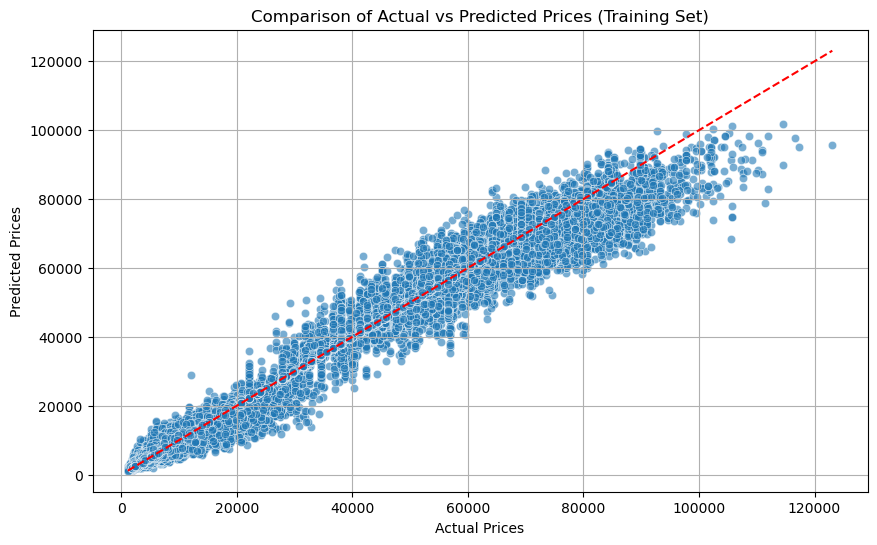

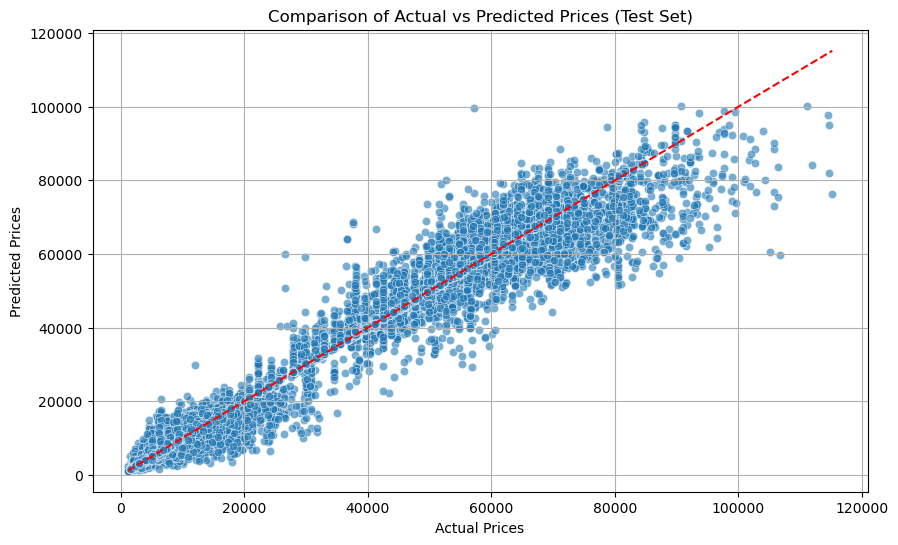

In [40]:
# Visualization of Actual vs Predicted
def plot_actual_vs_predicted(y_actual, y_pred, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_actual, y=y_pred, alpha=0.6)
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='red', linestyle='--')
    plt.title(title)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.grid(True)
    plt.show()

# Plot comparison on the training set
plot_actual_vs_predicted(y_train, best_model.predict(X_train), "Comparison of Actual vs Predicted Prices (Training Set)")

# Plot comparison on the test set
plot_actual_vs_predicted(y_test, best_model.predict(X_test), "Comparison of Actual vs Predicted Prices (Test Set)")


> Analysis of Actual vs Predicted Price Visualizations

 **Strengths**
1. **High Accuracy**: The predictions align closely with actual prices, as shown by the points following the diagonal line.
2. **Good Generalization**: Consistent results between training and test sets indicate minimal overfitting.
3. **Business Utility**: Accurate predictions help airlines optimize pricing and travelers find affordable tickets.

 **Weaknesses**
1. **Outlier Handling**: The model struggles with high-price outliers, deviating significantly from actual values.
2. **Limited Factors**: Pricing dynamics like promotions, seasonality, and competition are not fully captured.




# Conclusion 

 > Project Conclusion

 **Summary of Processes**
This project aimed to predict flight ticket prices based on various features such as airline, source, destination, travel class, and other attributes. The following steps were taken:
1. **Exploratory Data Analysis (EDA)**: Explored data distribution, identified correlations, and visualized patterns to understand the dataset.
2. **Data Preprocessing**: Handled missing values, encoded categorical features, scaled numerical data, and ensured the dataset was ready for modeling.
3. **Model Training**: Multiple regression models (Linear Regression, KNN, Random Forest, Gradient Boosting, and Decision Tree) were trained and evaluated using cross-validation.
4. **Model Evaluation**: The best model, Random Forest, was selected based on its performance (low Mean CV MSE and consistent standard deviation).
5. **Validation and Visualization**: Visualizations of actual vs predicted prices were generated to assess the model's accuracy and limitations.

 **Achievement of Targets**
The processes followed were aligned with the project's objectives:
- The model accurately predicts ticket prices for the majority of cases, achieving an R² score of 0.99 on both training and test sets.
- Visualizations demonstrated that the predictions closely match actual values, with only minor deviations for outliers.
- The project provides actionable insights for both airlines and travelers, meeting the original goal.

 **Model Performance**
The model performed well overall:
- Predicted prices align closely with actual values, indicating strong accuracy.
- The model generalizes effectively between training and test data, showing minimal overfitting.
- However, some high-price outliers were not captured perfectly, presenting room for improvement.

 **Opportunities for Improvement**
1. **Feature Expansion**: Include additional features such as seasonality, promotions, and competitor pricing to capture complex pricing dynamics.
2. **Outlier Handling**: Explore advanced techniques to better handle outliers in ticket prices.
3. **Dynamic Factors**: Incorporate real-time data to enhance prediction accuracy for constantly changing ticket prices.

 **Connection to Business**
- **For Airlines**: The model provides a foundation for dynamic pricing strategies, helping optimize ticket prices based on demand and market trends.
- **For Travelers**: Predictions offer insights into the best times and routes to book tickets for cost savings.
- **For Travel Platforms**: The insights can help recommend optimal flight deals to users, enhancing customer satisfaction and increasing revenue.

 **Conclusion**
This project demonstrates the feasibility of using machine learning to predict flight ticket prices with high accuracy. While the model delivers strong results, incorporating additional contextual features could enhance its performance further, providing greater value to businesses and consumers alike.


# Conceptual Problems

**1. Bagging**

Bagging is used to reduce overfitting. It works by training multiple models on random samples of the data. Then, the predictions are combined, so the final result is more stable and not too affected by specific data.

---

**2.Comparison of Random Forest vs Gradient Boosting**

| Model              | Focused On Reducing         | Explanation                                                                 |
|-------------------|-----------------------------|------------------------------------------------------------------------------|
| **Random Forest**  | Variance (via Bagging)      | More stable and less prone to overfitting, but sometimes less accurate than boosting. |
| **Gradient Boosting** | Bias (then gradually variance) | High accuracy, but prone to overfitting and needs proper parameter tuning.   |

---

 **3.Cross Validation**

Cross validation is a method to check how well the model performs. The data is split into several parts (based on the number of CV folds). The model is trained on some parts and tested on the rest, and this process is repeated.  
So, the evaluation is more fair and not just based on one test set. Then, the result would be the **mean** of the chosen evaluation metric and its **standard deviation**. *(The lower the better).*
